<a href="https://colab.research.google.com/github/suryatejaganji/DATA-ANALYSIS-USING-PYTHON/blob/main/Week_6_Wed_03_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Systolic_BP_mmHg
0               151
1               114
2               171
3               160
4               120


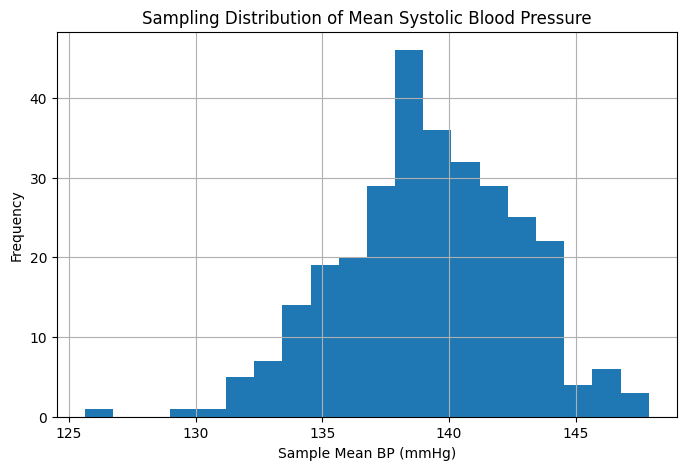

Population Mean: 138.9815
Population Std Dev: 23.219576484424888
Mean of Sample Means: 139.23573333333334
Standard Error: 3.47593332246495


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. Generate 2,000 systolic blood pressure readings
# ------------------------------------------------------
np.random.seed(42)
blood_pressure_values = np.random.randint(100, 181, size=2000)

# Convert to DataFrame
df_bp = pd.DataFrame({"Systolic_BP_mmHg": blood_pressure_values})
print(df_bp.head())

# ------------------------------------------------------
# 2. Draw multiple random samples and compute sample means
# ------------------------------------------------------
num_samples = 300      # number of samples
sample_size = 50       # number of patients per sample
sample_means = []

for _ in range(num_samples):
    sample = df_bp["Systolic_BP_mmHg"].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

# These lines should be outside the loop
sample_means = np.array(sample_means)

# ------------------------------------------------------
# 3. Plot the Sampling Distribution (CLT Demonstration)
# ------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=20)  # no color specified
plt.title("Sampling Distribution of Mean Systolic Blood Pressure")
plt.xlabel("Sample Mean BP (mmHg)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ------------------------------------------------------
# 4. Print summary statistics
# ------------------------------------------------------
print("Population Mean:", df_bp["Systolic_BP_mmHg"].mean())
print("Population Std Dev:", df_bp["Systolic_BP_mmHg"].std())
print("Mean of Sample Means:", sample_means.mean())
print("Standard Error:", sample_means.std())

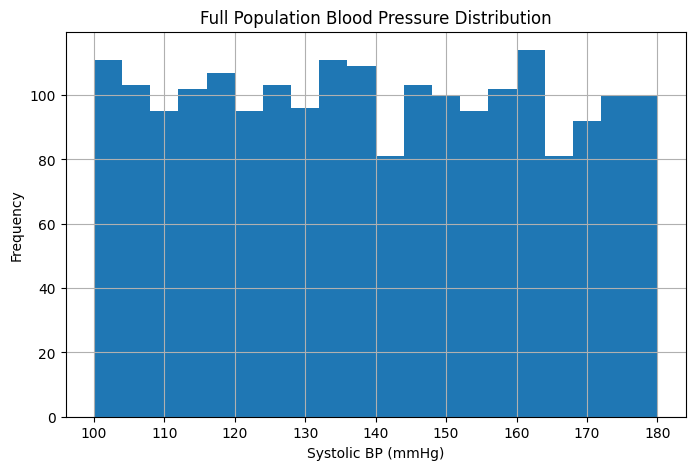

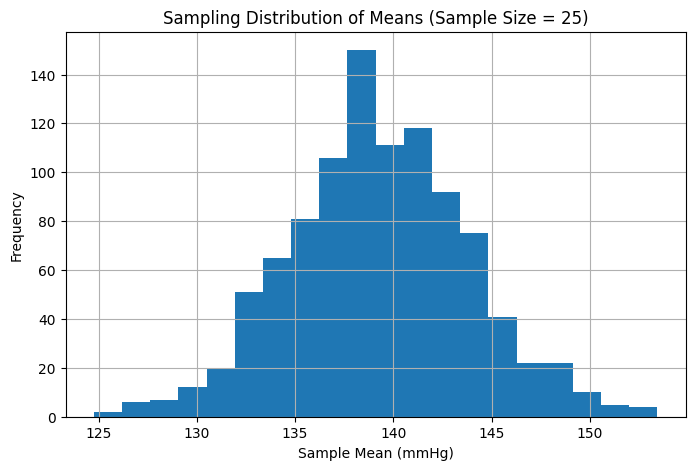

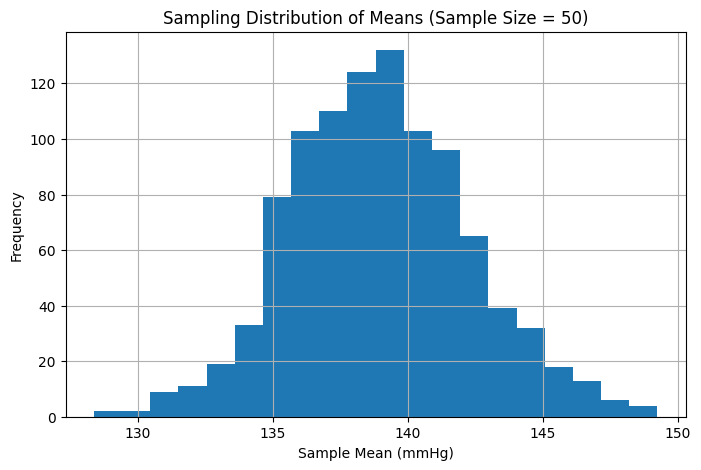

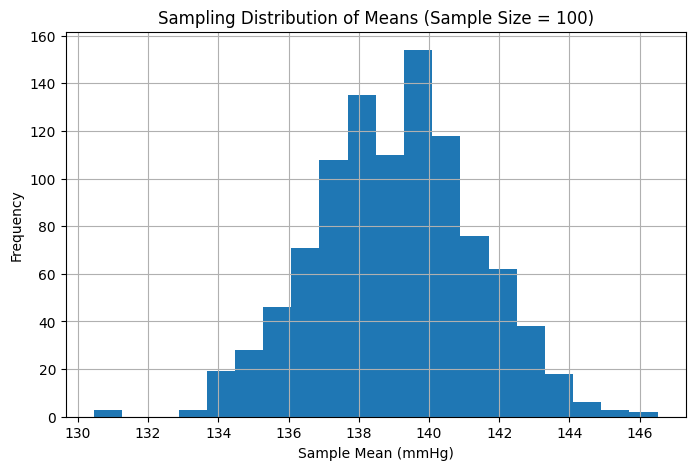

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. Generate the dataset (2,000 systolic BP readings)
# ------------------------------------------------------
np.random.seed(42)
bp_values = np.random.randint(100, 181, size=2000)
df_bp = pd.DataFrame({"Systolic_BP_mmHg": bp_values})

# ------------------------------------------------------
# 2. Plot histogram of the full dataset
# ------------------------------------------------------
plt.figure(figsize=(8,5))
plt.hist(df_bp["Systolic_BP_mmHg"], bins=20)
plt.title("Full Population Blood Pressure Distribution")
plt.xlabel("Systolic BP (mmHg)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ------------------------------------------------------
# 3. Sampling distributions for sample sizes (25, 50, 100)
# ------------------------------------------------------
sample_sizes = [25, 50, 100]
num_iterations = 1000
sample_means = {}

for size in sample_sizes:
    means = []
    for _ in range(num_iterations):
        sample = df_bp["Systolic_BP_mmHg"].sample(size, replace=True)
        means.append(sample.mean())
    sample_means[size] = np.array(means)

# ------------------------------------------------------
# 4. Plot histograms of sample means for each sample size
# ------------------------------------------------------
for size in sample_sizes:
    plt.figure(figsize=(8,5))
    plt.hist(sample_means[size], bins=20)
    plt.title(f"Sampling Distribution of Means (Sample Size = {size})")
    plt.xlabel("Sample Mean (mmHg)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [5]:
mean_bp = df_bp["Systolic_BP_mmHg"].mean()
median_bp = df_bp["Systolic_BP_mmHg"].median()
variance_bp = df_bp["Systolic_BP_mmHg"].var()
std_dev_bp = df_bp["Systolic_BP_mmHg"].std()

print(f"Mean Systolic BP: {mean_bp:.2f} mmHg")
print(f"Median Systolic BP: {median_bp:.2f} mmHg")
print(f"Variance Systolic BP: {variance_bp:.2f} (mmHg)^2")
print(f"Standard Deviation Systolic BP: {std_dev_bp:.2f} mmHg")

Mean Systolic BP: 138.98 mmHg
Median Systolic BP: 138.00 mmHg
Variance Systolic BP: 539.15 (mmHg)^2
Standard Deviation Systolic BP: 23.22 mmHg


In [6]:
print("Standard Deviations of Sample Means:")
for size in sample_sizes:
    std_dev_sample_means = sample_means[size].std()
    print(f"Sample Size {size}: {std_dev_sample_means:.2f}")

Standard Deviations of Sample Means:
Sample Size 25: 4.59
Sample Size 50: 3.31
Sample Size 100: 2.30


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. Generate the dataset (2,000 systolic BP readings)
# ------------------------------------------------------
np.random.seed(42)
bp_values = np.random.randint(100, 181, size=2000)
df_bp = pd.DataFrame({"Systolic_BP_mmHg": bp_values})

# ------------------------------------------------------
# 2. User-defined sample size
# ------------------------------------------------------
custom_size = int(input("Enter your sample size (e.g., 40, 75, 150): "))

num_iterations = 1000
custom_means = []

for _ in range(num_iterations):
    sample = df_bp["Systolic_BP_mmHg"].sample(custom_size, replace=True)
    custom_means.append(sample.mean())

custom_means = np.array(custom_means)
print(f"\nStandard Error for sample size {custom_size}: {custom_means.std():.4f}")

# ------------------------------------------------------
# 3. Standard Error vs Sample Size Curve
# ------------------------------------------------------
sample_sizes = [10, 20, 30, 40, 50, 75, 100, 150, 200, 300]
standard_errors = []

for size in sample_sizes:
    temp_means = []
    for _ in range(num_iterations):
        sample = df_bp["Systolic_BP_mmHg"].sample(size, replace=True)
        temp_means.append(sample.mean())
    standard_errors.append(np.std(temp_means))

# ------------------------------------------------------
# 4. Line Plot: Sample Size vs Standard Error
# ------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, standard_errors, marker='o')
plt.title("Standard Error vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Standard Error of Sample Means")
plt.grid(True)
plt.show()